In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [20]:
data = pd.read_pickle('/content/smart_app_data.pkl')

In [ ]:
data

,time,asset_id,name,kpi,sum,avg,min,max
0,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,working_time,0.000000,0.000000,0.0,0.000000
1,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,idle_time,0.000000,0.000000,0.0,0.000000
2,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,offline_time,0.000000,0.000000,0.0,0.000000
3,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,consumption,0.066106,0.002321,0.0,0.066106
4,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,power,NaN,0.003673,0.0,0.012801
...,...,...,...,...,...,...,...,...
96915,2024-10-19T00:00:00Z,ast-06kbod797nnp,Testing Machine 3,cost_idle,0.000000,0.000000,0.0,0.000000
96924,2024-10-19T00:00:00Z,ast-06kbod797nnp,Testing Machine 3,cycles,0.000000,0.000000,0.0,0.000000
96925,2024-10-19T00:00:00Z,ast-06kbod797nnp,Testing Machine 3,good_cycles,0.000000,0.000000,0.0,0.000000
96926,2024-10-19T00:00:00Z,ast-06kbod797nnp,Testing Machine 3,bad_cycles,0.000000,0.000000,0.0,0.000000


In [ ]:
data.columns

Index(['time', 'asset_id', 'name', 'kpi', 'sum', 'avg', 'min', 'max'], dtype='object')

In [ ]:
data.kpi.unique()

array(['working_time', 'idle_time', 'offline_time', 'consumption',
       'power', 'consumption_working', 'consumption_idle', 'cost',
       'cost_working', 'cost_idle', 'cycles', 'good_cycles', 'bad_cycles',
       'average_cycle_time'], dtype=object)

In [ ]:
data.name.unique()

array(['Large Capacity Cutting Machine 1', 'Riveting Machine',
       'Medium Capacity Cutting Machine 1', 'Laser Cutter',
       'Large Capacity Cutting Machine 2',
       'Medium Capacity Cutting Machine 2', 'Testing Machine 1',
       'Testing Machine 2', 'Low Capacity Cutting Machine 1',
       'Medium Capacity Cutting Machine 3', 'Assembly Machine 1',
       'Laser Welding Machine 1', 'Assembly Machine 2',
       'Assembly Machine 3', 'Laser Welding Machine 2',
       'Testing Machine 3'], dtype=object)

In [ ]:
data_LCCM = data.loc[data['name'] == 'Large Capacity Cutting Machine 1']

In [ ]:
data_LCCM

,time,asset_id,name,kpi,sum,avg,min,max
0,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,working_time,0.000000,0.000000,0.0,0.000000
1,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,idle_time,0.000000,0.000000,0.0,0.000000
2,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,offline_time,0.000000,0.000000,0.0,0.000000
3,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,consumption,0.066106,0.002321,0.0,0.066106
4,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,power,NaN,0.003673,0.0,0.012801
...,...,...,...,...,...,...,...,...
92625,2024-10-19T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,cost_idle,0.000000,0.000000,0.0,0.000000
92634,2024-10-19T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,cycles,0.000000,0.000000,0.0,0.000000
92635,2024-10-19T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,good_cycles,0.000000,0.000000,0.0,0.000000
92636,2024-10-19T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,bad_cycles,0.000000,0.000000,0.0,0.000000


In [ ]:
data_LCCM.time.unique()

array(['2024-03-01T00:00:00Z', '2024-03-02T00:00:00Z',
       '2024-03-03T00:00:00Z', '2024-03-04T00:00:00Z',
       '2024-03-05T00:00:00Z', '2024-03-06T00:00:00Z',
       '2024-03-07T00:00:00Z', '2024-03-08T00:00:00Z',
       '2024-03-09T00:00:00Z', '2024-03-10T00:00:00Z',
       '2024-03-11T00:00:00Z', '2024-03-12T00:00:00Z',
       '2024-03-13T00:00:00Z', '2024-03-14T00:00:00Z',
       '2024-03-15T00:00:00Z', '2024-03-16T00:00:00Z',
       '2024-03-17T00:00:00Z', '2024-03-18T00:00:00Z',
       '2024-03-19T00:00:00Z', '2024-03-20T00:00:00Z',
       '2024-03-21T00:00:00Z', '2024-03-22T00:00:00Z',
       '2024-03-23T00:00:00Z', '2024-03-24T00:00:00Z',
       '2024-03-25T00:00:00Z', '2024-03-26T00:00:00Z',
       '2024-03-27T00:00:00Z', '2024-03-28T00:00:00Z',
       '2024-03-29T00:00:00Z', '2024-03-30T00:00:00Z',
       '2024-03-31T00:00:00Z', '2024-04-01T00:00:00Z',
       '2024-04-02T00:00:00Z', '2024-04-03T00:00:00Z',
       '2024-04-04T00:00:00Z', '2024-04-05T00:00:00Z',
       '20

In [ ]:
G = nx.DiGraph()

G.add_nodes_from(['Di Caprio','Reeves', 'Titanic', 'Matrix', 'Cameron', 'Wachowski', 'Sci-fi', 'Dramatic'])
G.add_edge('Di Caprio', 'Titanic', label = "Recita in")
G.add_edge('Reeves', 'Matrix', label = "Recita in")
G.add_edge('Cameron', 'Titanic', label = "Ha diretto")
G.add_edge('Wachowski', 'Matrix', label = "ha diretto")
G.add_edge('Dramatic', 'Titanic', label = "genere")
G.add_edge('Matrix', 'Sci-fi', label = "genere")

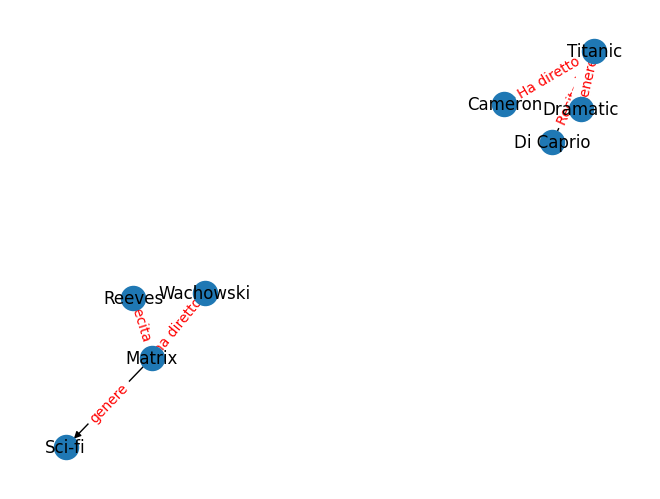

In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, with_labels = True, pos = pos)
edge_labels = nx.get_edge_attributes(G, 'label')  # Retrieve edge labels
nx.draw_networkx_edge_labels(G, pos = pos, edge_labels=edge_labels, font_color='red')
plt.show()

In [2]:
!pip install neo4j

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 6.7 MB/s eta 0:00:00


In [3]:
from neo4j import GraphDatabase

class Neo4jConnection:
    def __init__(self, uri, user, password):
        try:
            self.driver = GraphDatabase.driver(uri, auth=(user, password))
            print("Connected to Neo4j successfully.")
        except Exception as e:
            print(f"Failed to connect to Neo4j: {e}")

    def close(self):
        if hasattr(self, 'driver'):
            self.driver.close()
            print("Connection closed.")

    def run_query(self, query, parameters=None):
        with self.driver.session() as session:
            result = session.run(query, parameters)
            return [record.data() for record in result]

    def insert_machines(self, machines_df):
        with self.driver.session() as session:
            for _, row in machines_df.iterrows():
                session.run("""
                    MERGE (m:Machine {asset_id: $asset_id})
                    SET m.name = $name
                    """,
                    asset_id=row['asset_id'], name=row['name'])

    def insert_kpis(self, kpis_df):
        with self.driver.session() as session:
            for _, row in kpis_df.iterrows():
                session.run("""
                    MATCH (m:Machine {asset_id: $asset_id})
                    CREATE (k:KPI {kpi: $kpi, sum: $sum, avg: $avg, min: $min, max: $max, time: $time})
                    CREATE (m)-[:HAS_KPI]->(k)
                    """,
                    asset_id=row['asset_id'], kpi=row['kpi'], sum=row['sum'], avg=row['avg'],
                    min=row['min'], max=row['max'], time=row['time'])

    def delete_all_data(self):
      with self.driver.session() as session:
        session.run("MATCH (n) DETACH DELETE n")
        print("All data deleted.")


conn = Neo4jConnection(uri="bolt://44.208.34.161:7687",
                       user="neo4j",
                       password="holes-augmentation-majority")

Connected to Neo4j successfully.


In [21]:
random_selection = data.sample(n=15, random_state=20)

In [22]:
random_selection

,time,asset_id,name,kpi,sum,avg,min,max
26257,2024-06-30T00:00:00Z,ast-6votor3o4i9l,Large Capacity Cutting Machine 2,good_cycles,0.000000,0.000000,0.000000,0.000000
79927,2024-09-05T00:00:00Z,ast-sfio4727eub0,Assembly Machine 3,consumption,0.000000,0.000000,0.000000,0.000000
10951,2024-09-16T00:00:00Z,ast-o8xtn5xa8y87,Riveting Machine,consumption_working,0.001000,0.001000,0.001000,0.001000
69145,2024-10-04T00:00:00Z,ast-hnsa8phk2nay,Laser Welding Machine 1,cost,0.007417,0.001000,0.001000,0.007417
40583,2024-03-07T00:00:00Z,ast-pu7dfrxjf2ms,Testing Machine 2,good_cycles,0.000000,0.000000,0.000000,0.000000
92818,2024-10-15T00:00:00Z,ast-o8xtn5xa8y87,Riveting Machine,bad_cycles,0.000000,0.000000,0.000000,0.000000
27779,2024-08-28T00:00:00Z,ast-6votor3o4i9l,Large Capacity Cutting Machine 2,cost,0.024401,0.003783,0.001000,0.024401
14280,2024-06-14T00:00:00Z,ast-ha448od5d6bd,Medium Capacity Cutting Machine 1,consumption_idle,0.012052,0.002369,0.000921,0.001577
11810,2024-03-11T00:00:00Z,ast-ha448od5d6bd,Medium Capacity Cutting Machine 1,consumption_idle,0.071939,0.003034,0.001470,0.010038
61226,2024-07-13T00:00:00Z,ast-pwpbba0ewprp,Assembly Machine 1,cycles,0.000000,0.000000,0.000000,0.000000


In [23]:
db_machine = random_selection[['asset_id', 'name']]
db_kpis = random_selection[['asset_id','kpi', 'sum', 'avg', 'min', 'max', 'time']]

In [24]:
db_machine.name.unique()

array(['Large Capacity Cutting Machine 2', 'Assembly Machine 3',
       'Riveting Machine', 'Laser Welding Machine 1', 'Testing Machine 2',
       'Medium Capacity Cutting Machine 1', 'Assembly Machine 1',
       'Laser Welding Machine 2', 'Low Capacity Cutting Machine 1'],
      dtype=object)

In [27]:
conn.insert_machines(db_machine)
conn.insert_kpis(db_kpis)

In [26]:
conn.delete_all_data()

All data deleted.


In [ ]:
conn.close()

Connection closed.


In [4]:
machines_query = "MATCH (m:Machine) RETURN m.name AS machine_name, m.asset_id AS asset_id"
machines = conn.run_query(machines_query)
for m in machines:
  print(m)

{'machine_name': 'Large Capacity Cutting Machine 2', 'asset_id': 'ast-6votor3o4i9l'}
{'machine_name': 'Assembly Machine 3', 'asset_id': 'ast-sfio4727eub0'}
{'machine_name': 'Riveting Machine', 'asset_id': 'ast-o8xtn5xa8y87'}
{'machine_name': 'Laser Welding Machine 1', 'asset_id': 'ast-hnsa8phk2nay'}
{'machine_name': 'Testing Machine 2', 'asset_id': 'ast-pu7dfrxjf2ms'}
{'machine_name': 'Medium Capacity Cutting Machine 1', 'asset_id': 'ast-ha448od5d6bd'}
{'machine_name': 'Assembly Machine 1', 'asset_id': 'ast-pwpbba0ewprp'}
{'machine_name': 'Laser Welding Machine 2', 'asset_id': 'ast-206phi0b9v6p'}
{'machine_name': 'Low Capacity Cutting Machine 1', 'asset_id': 'ast-6nv7viesiao7'}


In [5]:
kpi_query = """
MATCH (m:Machine {asset_id: $asset_id})-[:HAS_KPI]->(k:KPI)
RETURN k.kpi AS kpi, k.sum AS sum, k.avg AS avg, k.min AS min, k.max AS max
"""
kpis = conn.run_query(kpi_query, parameters={'asset_id': 'ast-6votor3o4i9l'})
for k in kpis:
  print(k)

{'kpi': 'good_cycles', 'sum': 0.0, 'avg': 0.0, 'min': 0.0, 'max': 0.0}
{'kpi': 'cost', 'sum': 0.024401104389114966, 'avg': 0.0037832825082302814, 'min': 0.001, 'max': 0.024401104389114966}


In [6]:
!pip install --upgrade langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.7/408.7 kB 28.1 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.13
    Uninstalling langchain-core-0.3.13:
      Successfully uninstalled langchain-core-0.3.13
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.4
    Uninstalling langchain-0.3.4:
      Successfully uninstalled langchain-0.3.4


In [7]:
!pip install torch transformers

In [8]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
def query_database(query):
    with conn.driver.session() as session:
        result = session.run(query)
        return [record.data() for record in result]

In [28]:
from transformers import pipeline

class LangChainManager:
    def __init__(self, conn: Neo4jConnection):
        self.conn = conn
        self.llm = pipeline("text-generation", model="gpt2")

    def retrieve_and_respond(self, query):

        data = self.conn.run_query(query)

        data_text = "\n".join(str(record) for record in data)

        prompt = (
            f"Please summarize and translate this query into natural language: '{query}'. "
            f"Based on that, here's what I found:\n{data_text}\n"
        )


        response = self.llm(prompt, max_new_tokens=150)  # Adjust token limit as needed

        return response[0]['generated_text']

In [14]:
lc = LangChainManager(conn)

In [29]:
query = """
MATCH (m:Machine)-[:HAS_KPI]->(k:KPI)
RETURN m.asset_id AS asset_id, m.name AS name, k.kpi AS kpi, k.sum AS sum, k.avg AS avg
LIMIT 5
"""

response = lc.retrieve_and_respond(machines_query)
print(response)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Please summarize and translate this query into natural language: 'MATCH (m:Machine) RETURN m.name AS machine_name, m.asset_id AS asset_id'. Based on that, here's what I found:
{'machine_name': 'Large Capacity Cutting Machine 2', 'asset_id': 'ast-6votor3o4i9l'}
{'machine_name': 'Assembly Machine 3', 'asset_id': 'ast-sfio4727eub0'}
{'machine_name': 'Riveting Machine', 'asset_id': 'ast-o8xtn5xa8y87'}
{'machine_name': 'Laser Welding Machine 1', 'asset_id': 'ast-hnsa8phk2nay'}
{'machine_name': 'Testing Machine 2', 'asset_id': 'ast-pu7dfrxjf2ms'}
{'machine_name': 'Medium Capacity Cutting Machine 1', 'asset_id': 'ast-ha448od5d6bd'}
{'machine_name': 'Assembly Machine 1', 'asset_id': 'ast-pwpbba0ewprp'}
{'machine_name': 'Laser Welding Machine 2', 'asset_id': 'ast-206phi0b9v6p'}
{'machine_name': 'Low Capacity Cutting Machine 1', 'asset_id': 'ast-6nv7viesiao7'}
{'machine_name': 'Riveting Machine 3', 'asset_id': 'ast-hk4lqfc1xwv'}
{'machine_name': 'Laser Welding Machine 2', 'asset_id': 'ast-h8y8h5